In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pylab as plt
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

In [18]:
micro = pd.read_csv('Micro/micro.csv')

In [19]:
meso = pd.read_csv('Meso/meso.csv')

In [20]:
macro = pd.read_csv('Macro/macro.csv')

In [21]:
micro.shape

(111, 6)

In [22]:
meso.shape

(203, 6)

In [23]:
macro.shape

(139, 6)

In [24]:
df = pd.merge(meso, macro, left_on='country', right_on='Country')

In [25]:
df.shape

(136, 12)

In [26]:
df1 = pd.merge(df, micro, left_on='country', right_on='country')

In [27]:
df1.shape

(103, 17)

In [28]:
df1

,Unnamed: 0_x,country,Rule_law,control_corruption,reg_quality,cluster_x,Unnamed: 0_y,Country,GDP_P_PPP,Mortality,GINI,cluster_y,Unnamed: 0,educ_index,StartupsPer100Hab,GEI,cluster
0,3,Angola,-1.239091,-1.334545,-1.028182,0,3,Angola,6406.375273,114.745455,42.7,1,2,0.474212,0.973671,0.144067,0
1,5,Albania,-0.486364,-0.608182,0.165455,2,1,Albania,9635.697273,16.172727,26.9,0,0,0.608519,9.214429,0.242072,2
2,7,Argentina,-0.642727,-0.414545,-0.792727,2,4,Argentina,19870.209182,13.772727,45.8,0,3,0.783356,8.719018,0.240189,2
3,8,Armenia,-0.402727,-0.621818,0.279091,2,5,Armenia,7178.099636,17.409091,30.3,0,4,0.701367,2.729956,0.228309,2
4,11,Australia,1.780909,1.946364,1.780909,1,6,Australia,43078.520273,4.600000,30.3,2,5,0.926536,34.436838,0.754537,1
5,12,Austria,1.860909,1.631818,1.505455,1,7,Austria,44033.614091,4.163636,26.3,2,6,0.794481,24.726823,0.660211,1
6,13,Azerbaijan,-0.792727,-1.080909,-0.369091,0,8,Azerbaijan,15147.451454,38.418182,33.7,0,7,0.699778,18.519293,0.304622,2
7,14,Burundi,-1.110909,-1.216364,-1.004545,0,21,Burundi,764.559364,91.281818,42.4,1,18,0.370089,0.092045,0.118262,0
8,15,Belgium,1.396364,1.511818,1.300909,1,12,Belgium,40947.735273,4.400000,25.9,2,11,0.812292,34.385200,0.637036,1
9,16,Benin,-0.581818,-0.611818,-0.441818,2,14,Benin,1839.238273,109.200000,36.5,1,13,0.413556,0.357920,0.132986,0


In [29]:
new_vars = ['Rule_law','control_corruption','reg_quality',
            'GDP_P_PPP','Mortality','GINI',
            'educ_index','StartupsPer100Hab','GEI','country']

In [30]:
X = df1[new_vars]

In [34]:
scaler = StandardScaler()
scaler.fit(X[X.columns.tolist()[:-1]])
X_scaled = scaler.transform(X[X.columns.tolist()[:-1]])

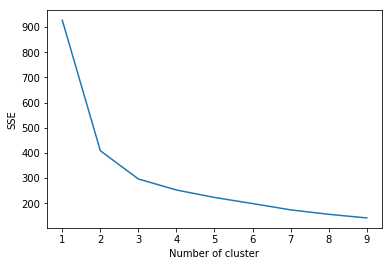

In [35]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_scaled)
    #X1["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [36]:
from sklearn.cluster import AgglomerativeClustering
kmeans = KMeans(n_clusters=3, random_state=0, max_iter=1000).fit(X_scaled)
agg = AgglomerativeClustering(n_clusters=3).fit(X_scaled)


In [37]:
kmeans.labels_

array([0, 2, 2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 2, 0, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0,
       1, 1, 1, 1, 2, 2, 1, 2, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2,
       0, 2, 1, 1, 0, 2, 2, 2, 1, 1, 2, 1, 2, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0,
       0, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0], dtype=int32)

In [38]:
agg.labels_

array([2, 1, 1, 1, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 2, 2, 2, 1, 1, 1,
       2, 1, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 1,
       2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [39]:
X['cluster'] = agg.labels_

/home/franca/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
cluster0 = X[X['cluster']==0]
cluster1 = X[X['cluster']==1]
cluster2 = X[X['cluster']==2]

In [41]:
cluster0

,Rule_law,control_corruption,reg_quality,GDP_P_PPP,Mortality,GINI,educ_index,StartupsPer100Hab,GEI,country,cluster
4,1.780909,1.946364,1.780909,43078.520273,4.600000,30.3,0.926536,34.436838,0.754537,Australia,0
5,1.860909,1.631818,1.505455,44033.614091,4.163636,26.3,0.794481,24.726823,0.660211,Austria,0
8,1.396364,1.511818,1.300909,40947.735273,4.400000,25.9,0.812292,34.385200,0.637036,Belgium,0
12,-0.077273,-0.208182,0.607273,16603.414182,10.163636,35.4,0.749407,13.832877,0.277893,Bulgaria,0
16,1.806364,1.963636,1.697273,41806.107000,5.490909,32.1,0.850300,4.169374,0.792453,Canada,0
17,1.839091,2.105455,1.658182,54535.629364,4.463636,28.7,0.844089,51.321348,0.804472,Switzerland,0
18,1.321818,1.422727,1.463636,20266.893909,8.700000,52.1,0.745675,18.000827,0.585179,Chile,0
23,1.085455,1.048182,1.205455,33340.636545,3.463636,32.4,0.776198,22.890066,0.479612,Cyprus,0
24,1.708182,1.793636,1.604545,42395.858364,4.154545,27.0,0.884372,0.154663,0.659348,Germany,0
25,1.957273,2.363636,1.808182,43351.780182,4.263636,24.8,0.872826,33.138277,0.743097,Denmark,0


In [42]:
cluster1

,Rule_law,control_corruption,reg_quality,GDP_P_PPP,Mortality,GINI,educ_index,StartupsPer100Hab,GEI,country,cluster
1,-0.486364,-0.608182,0.165455,9635.697273,16.172727,26.9,0.608519,9.214429,0.242072,Albania,1
2,-0.642727,-0.414545,-0.792727,19870.209182,13.772727,45.8,0.783356,8.719018,0.240189,Argentina,1
3,-0.402727,-0.621818,0.279091,7178.099636,17.409091,30.3,0.701367,2.729956,0.228309,Armenia,1
6,-0.792727,-1.080909,-0.369091,15147.451454,38.418182,33.7,0.699778,18.519293,0.304622,Azerbaijan,1
11,-0.792727,-0.998182,-0.899091,2848.456091,47.300000,32.1,0.446880,0.242910,0.118365,Bangladesh,1
13,-0.438182,-0.223636,-0.451818,7788.856818,18.000000,53.3,0.688889,10.675748,0.300263,Belize,1
14,-0.142727,-0.120909,0.008182,14438.205909,19.227273,48.7,0.661306,4.300289,0.203335,Brazil,1
15,0.635455,0.952727,0.515455,14009.338909,51.818182,63.0,0.619000,14.400036,0.348815,Botswana,1
19,-0.452727,-0.442727,-0.231818,10286.134273,15.063636,42.2,0.609667,0.217096,0.411443,China,1
21,-0.359091,-0.307273,0.320909,11676.805454,18.054545,53.5,0.602222,8.947203,0.381635,Colombia,1


In [43]:
cluster2

,Rule_law,control_corruption,reg_quality,GDP_P_PPP,Mortality,GINI,educ_index,StartupsPer100Hab,GEI,country,cluster
0,-1.239091,-1.334545,-1.028182,6406.375273,114.745455,42.7,0.474212,0.973671,0.144067,Angola,2
7,-1.110909,-1.216364,-1.004545,764.559364,91.281818,42.4,0.370089,0.092045,0.118262,Burundi,2
9,-0.581818,-0.611818,-0.441818,1839.238273,109.200000,36.5,0.413556,0.357920,0.132986,Benin,2
10,-0.402727,-0.351818,-0.237273,1485.096545,112.136364,39.5,0.250033,0.104203,0.131650,Burkina Faso,2
20,-1.061818,-1.107273,-0.845455,2727.737636,103.781818,44.6,0.485789,2.868578,0.154469,Cameroon,2
31,-0.643636,-0.582727,-0.998182,1273.842545,78.081818,33.0,0.316522,0.247719,0.183316,Ethiopia,2
38,-1.403636,-1.095455,-1.066364,1175.123455,106.527273,39.4,0.294445,0.157268,0.129123,Guinea,2
56,-0.925455,-0.652727,-1.090909,767.051000,87.254545,33.2,0.367244,0.211331,0.157338,Liberia,2
63,-0.516364,-0.650909,-0.473636,1990.722909,133.327273,40.1,0.305181,0.161795,0.158594,Mali,2
64,-0.685455,-0.588182,-0.476364,967.543364,96.336364,45.6,0.372056,0.404465,0.140131,Mozambique,2


In [44]:
clus = cluster0[cluster0['country']!='Luxembourg']

In [45]:
 clus1 = clus[clus['country']!='Qatar']

In [46]:
clus1

,Rule_law,control_corruption,reg_quality,GDP_P_PPP,Mortality,GINI,educ_index,StartupsPer100Hab,GEI,country,cluster
4,1.780909,1.946364,1.780909,43078.520273,4.600000,30.3,0.926536,34.436838,0.754537,Australia,0
5,1.860909,1.631818,1.505455,44033.614091,4.163636,26.3,0.794481,24.726823,0.660211,Austria,0
8,1.396364,1.511818,1.300909,40947.735273,4.400000,25.9,0.812292,34.385200,0.637036,Belgium,0
12,-0.077273,-0.208182,0.607273,16603.414182,10.163636,35.4,0.749407,13.832877,0.277893,Bulgaria,0
16,1.806364,1.963636,1.697273,41806.107000,5.490909,32.1,0.850300,4.169374,0.792453,Canada,0
17,1.839091,2.105455,1.658182,54535.629364,4.463636,28.7,0.844089,51.321348,0.804472,Switzerland,0
18,1.321818,1.422727,1.463636,20266.893909,8.700000,52.1,0.745675,18.000827,0.585179,Chile,0
23,1.085455,1.048182,1.205455,33340.636545,3.463636,32.4,0.776198,22.890066,0.479612,Cyprus,0
24,1.708182,1.793636,1.604545,42395.858364,4.154545,27.0,0.884372,0.154663,0.659348,Germany,0
25,1.957273,2.363636,1.808182,43351.780182,4.263636,24.8,0.872826,33.138277,0.743097,Denmark,0


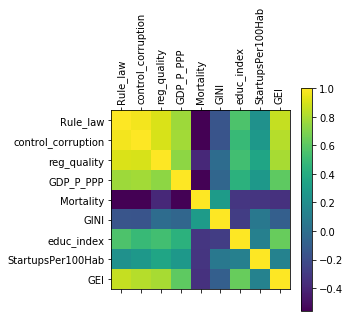

In [51]:
plt.matshow(clus1[cluster0.columns.tolist()[:-2]].corr())
plt.colorbar()
plt.xticks(range(len(cluster0.columns.tolist()[:-2])),cluster0.columns.tolist()[:-2], rotation=90)
plt.yticks(range(len(cluster0.columns.tolist()[:-2])),cluster0.columns.tolist()[:-2])
plt.tight_layout
plt.show()

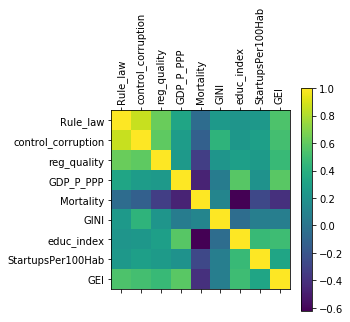

In [48]:
plt.matshow(cluster1[cluster1.columns.tolist()[:-2]].corr())
plt.colorbar()
plt.xticks(range(len(cluster1.columns.tolist()[:-2])),cluster1.columns.tolist()[:-2], rotation=90)
plt.yticks(range(len(cluster1.columns.tolist()[:-2])),cluster1.columns.tolist()[:-2])
plt.tight_layout
plt.show()

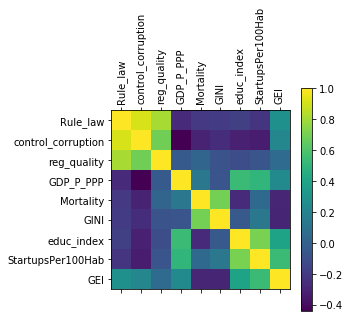

In [49]:
plt.matshow(cluster2[cluster2.columns.tolist()[:-2]].corr())
plt.colorbar()
plt.xticks(range(len(cluster2.columns.tolist()[:-2])),cluster2.columns.tolist()[:-2], rotation=90)
plt.yticks(range(len(cluster2.columns.tolist()[:-2])),cluster2.columns.tolist()[:-2])
plt.tight_layout
plt.show()

In [53]:
clf = IsolationForest(max_samples=100, random_state=0)
clf.fit(X_scaled)

IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples=100, n_estimators=100, n_jobs=1, random_state=0,
        verbose=0)

In [54]:
clf.predict(X_scaled)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1])

In [55]:
X["inliers"] = clf.predict(X_scaled)

/home/franca/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
X

,Rule_law,control_corruption,reg_quality,GDP_P_PPP,Mortality,GINI,educ_index,StartupsPer100Hab,GEI,country,cluster,inliers
0,-1.239091,-1.334545,-1.028182,6406.375273,114.745455,42.7,0.474212,0.973671,0.144067,Angola,2,1
1,-0.486364,-0.608182,0.165455,9635.697273,16.172727,26.9,0.608519,9.214429,0.242072,Albania,1,1
2,-0.642727,-0.414545,-0.792727,19870.209182,13.772727,45.8,0.783356,8.719018,0.240189,Argentina,1,1
3,-0.402727,-0.621818,0.279091,7178.099636,17.409091,30.3,0.701367,2.729956,0.228309,Armenia,1,1
4,1.780909,1.946364,1.780909,43078.520273,4.600000,30.3,0.926536,34.436838,0.754537,Australia,0,1
5,1.860909,1.631818,1.505455,44033.614091,4.163636,26.3,0.794481,24.726823,0.660211,Austria,0,1
6,-0.792727,-1.080909,-0.369091,15147.451454,38.418182,33.7,0.699778,18.519293,0.304622,Azerbaijan,1,1
7,-1.110909,-1.216364,-1.004545,764.559364,91.281818,42.4,0.370089,0.092045,0.118262,Burundi,2,1
8,1.396364,1.511818,1.300909,40947.735273,4.400000,25.9,0.812292,34.385200,0.637036,Belgium,0,1
9,-0.581818,-0.611818,-0.441818,1839.238273,109.200000,36.5,0.413556,0.357920,0.132986,Benin,2,1


In [58]:
X_inlier = X[X["inliers"]==1]

In [59]:
cluster00 = X_inlier[X_inlier['cluster']==0]
cluster11 = X_inlier[X_inlier['cluster']==1]
cluster22 = X_inlier[X_inlier['cluster']==2]

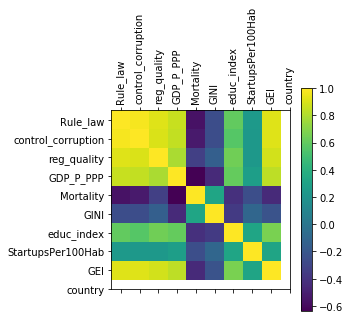

In [61]:
plt.matshow(cluster00[cluster00.columns.tolist()[:-2]].corr())
plt.colorbar()
plt.xticks(range(len(cluster00.columns.tolist()[:-2])),cluster00.columns.tolist()[:-2], rotation=90)
plt.yticks(range(len(cluster00.columns.tolist()[:-2])),cluster00.columns.tolist()[:-2])
plt.tight_layout
plt.show()

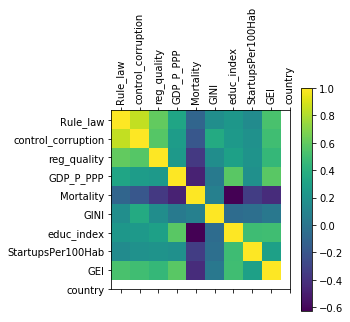

In [62]:
plt.matshow(cluster11[cluster11.columns.tolist()[:-2]].corr())
plt.colorbar()
plt.xticks(range(len(cluster11.columns.tolist()[:-2])),cluster11.columns.tolist()[:-2], rotation=90)
plt.yticks(range(len(cluster11.columns.tolist()[:-2])),cluster11.columns.tolist()[:-2])
plt.tight_layout
plt.show()

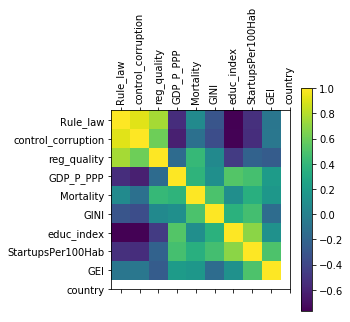

In [63]:
plt.matshow(cluster22[cluster22.columns.tolist()[:-2]].corr())
plt.colorbar()
plt.xticks(range(len(cluster22.columns.tolist()[:-2])),cluster22.columns.tolist()[:-2], rotation=90)
plt.yticks(range(len(cluster22.columns.tolist()[:-2])),cluster22.columns.tolist()[:-2])
plt.tight_layout
plt.show()

In [65]:
X_periferic = X_inlier[X_inlier["cluster"]!=0]

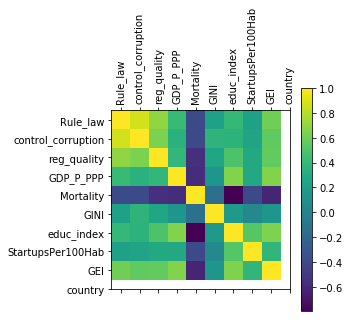

In [66]:
plt.matshow(X_periferic[X_periferic.columns.tolist()[:-2]].corr())
plt.colorbar()
plt.xticks(range(len(X_periferic.columns.tolist()[:-2])),X_periferic.columns.tolist()[:-2], rotation=90)
plt.yticks(range(len(X_periferic.columns.tolist()[:-2])),X_periferic.columns.tolist()[:-2])
plt.tight_layout
plt.show()

## Muito bem correlacionados GEI, Rure_law, control_corruption,	reg_quality

<IPython.core.display.Javascript object>


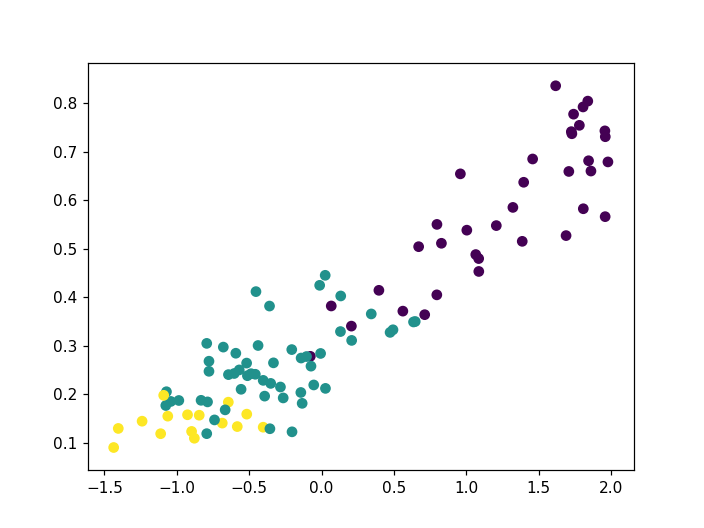

In [59]:
%matplotlib notebook 
plt.scatter(X['Rule_law'], X['GEI'], c=X['cluster'])
plt.show()

In [60]:
moral = pd.read_excel('/home/franca/Desktop/bases dados/Macro/WIMF-Moral freedom/moral freedom.xlsx')

In [62]:
moral1 = moral[['COUNTRY', 'WIMF 2016']]
df10 = pd.merge(moral1, X, left_on='COUNTRY', right_on='country')

<IPython.core.display.Javascript object>


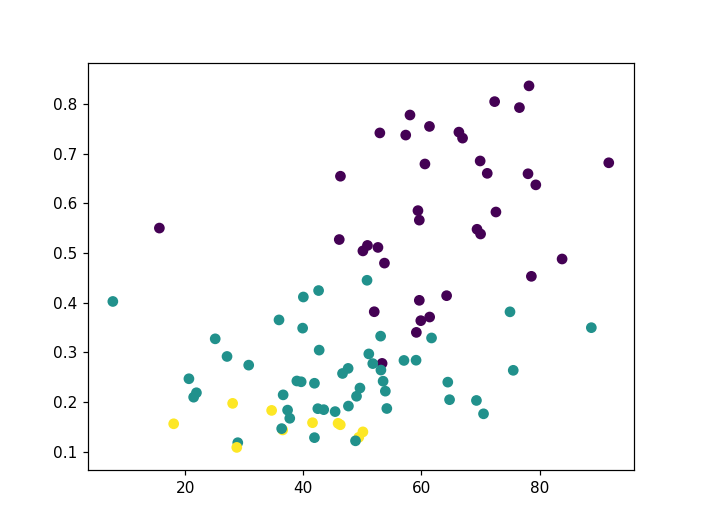

In [64]:
%matplotlib notebook 
plt.scatter(df10['WIMF 2016'], df10['GEI'], c=df10['cluster'])
plt.show()